In [1]:
import pandas as pd

In [2]:
chocolate_df = pd.read_csv('chocolate.csv')

In [3]:
chocolate_df

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


Commonly Used Ingredients

In [4]:
def changetobool(s):
  return s.apply(lambda x: False if 'not' in x else True)

In [5]:
chocolate_df['vanilla'] = changetobool(chocolate_df['vanilla'])

In [6]:
chocolate_df['cocoa_butter'] = changetobool(chocolate_df['cocoa_butter'])

In [7]:
chocolate_df['sugar'] = changetobool(chocolate_df['sugar'])

In [8]:
chocolate_df['salt'] = changetobool(chocolate_df['salt'])

In [9]:
chocolate_df['lecithin'] = changetobool(chocolate_df['lecithin'])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
ingredients_df = chocolate_df[['cocoa_butter','vanilla','lecithin','salt','sugar']].copy()

In [12]:
ingredients_percent = ingredients_df.mean().sort_values(ascending=False) * 100
ingredients_percent

sugar           96.312950
cocoa_butter    69.019784
lecithin        21.537770
vanilla         15.647482
salt             1.663669
dtype: float64

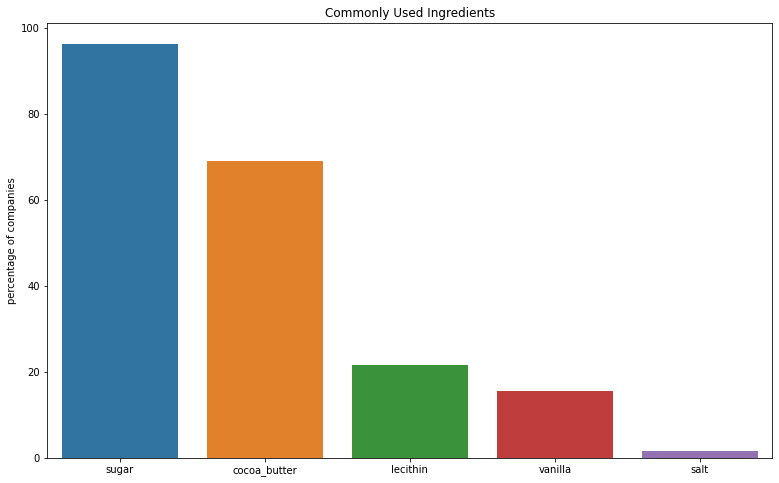

In [13]:
plt.figure(figsize=(13,8)) 
sns.barplot(x=ingredients_percent.index,y=ingredients_percent)
plt.title("Commonly Used Ingredients")
plt.ylabel('percentage of companies');

Percent of Cocoa Used Over Years

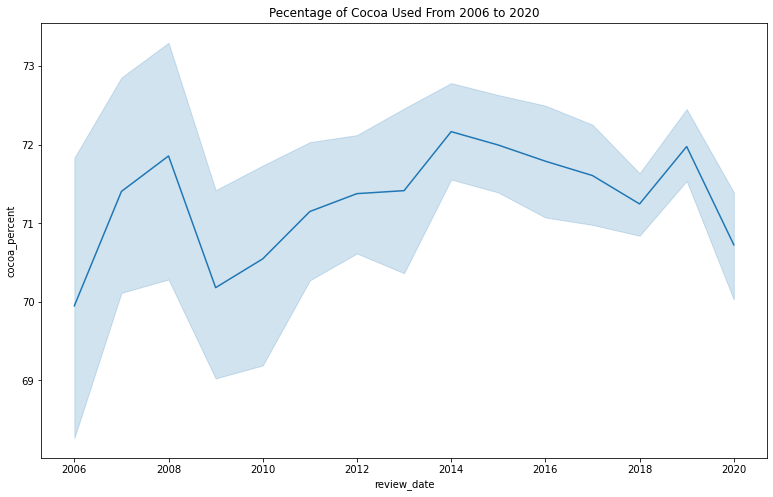

In [14]:
plt.figure(figsize=(13,8)) 
sns.lineplot(x=chocolate_df.review_date, y=chocolate_df.cocoa_percent)
plt.title("Pecentage of Cocoa Used From 2006 to 2020");

Percentage of Cocoa in Chocolate Bar Used by top rated companies

In [15]:
topRatedCompanies_df = chocolate_df[chocolate_df.rating == chocolate_df.rating.max()]
topRatedCompanies_df

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
5,5,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,4,have_bean,True,False,True,False,True,have_not_sweetener_without_sugar,oily,nut,caramel,raspberry
6,6,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,4.0,3,have_bean,True,False,False,False,True,have_not_sweetener_without_sugar,sweet,cocoa,tangerine,NaN
16,16,1319,A. Morin,France,2014,Peru,Pablino,70.0,4.0,4,have_bean,True,False,True,False,True,have_not_sweetener_without_sugar,delicate,hazelnut,brownie,NaN
72,72,470,Amano,U.S.A,2010,Ecuador,Guayas,70.0,4.0,4,have_bean,True,True,False,False,True,have_not_sweetener_without_sugar,strong spice,intense pepper,NaN,NaN
75,75,725,Amano,U.S.A,2011,Papua new guinea,Morobe,70.0,4.0,4,have_bean,True,True,False,False,True,have_not_sweetener_without_sugar,tart,lemon,smoke,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,2114,757,Valrhona,France,2011,Venezuela,"Porcelana, Pedegral",64.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,creamy,honey,peanut butter,NaN
2116,2116,931,Valrhona,France,2012,Venezuela,"Otucan, Grand Cru",69.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,green,unripened fruit,banana,NaN
2119,2119,1510,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63.0,4.0,5,have_bean,True,True,True,False,True,have_not_sweetener_without_sugar,intense,dark berry,grapes,NaN
2162,2162,1848,Willie's Cacao,U.k.,2016,Colombia,Los Llanos,70.0,4.0,3,have_bean,True,False,False,False,True,have_not_sweetener_without_sugar,rich cocoa,spicy,cinamon,NaN


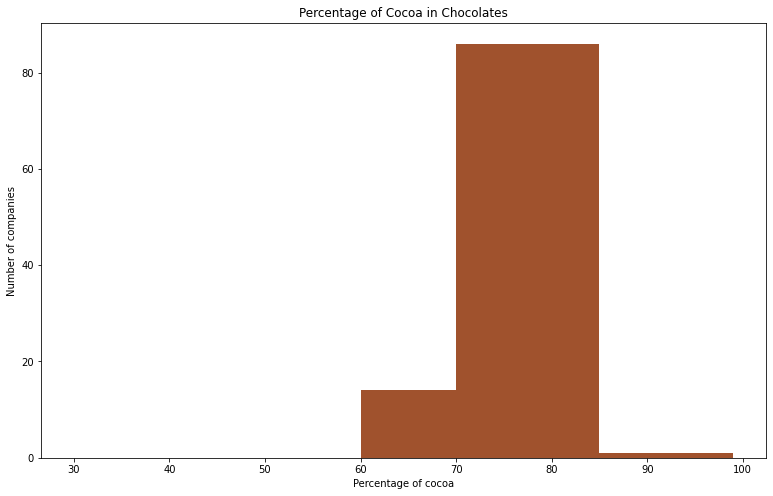

In [16]:
plt.figure(figsize=(13,8)) 
plt.title("Percentage of Cocoa in Chocolates")
plt.xlabel('Percentage of cocoa')
plt.ylabel('Number of companies')
plt.hist(topRatedCompanies_df.cocoa_percent, bins=[30, 50, 60, 70, 85, 99], color='Sienna');

Countries of Bean Origin for Top Rated Companies

In [17]:
topBeanCountries = topRatedCompanies_df.country_of_bean_origin.value_counts()
topBeanCountries

Venezuela           18
Peru                16
Madagascar          10
Ecuador              8
Blend                7
Colombia             5
Bolivia              5
Brazil               4
Papua new guinea     4
Haiti                3
Mexico               3
Guatemala            3
Belize               2
Costa rica           2
Ghana                2
Nicaragua            2
Indonesia            1
Vietnam              1
St. lucia            1
Solomon islands      1
Sao tome             1
Tanzania             1
Jamaica              1
Name: country_of_bean_origin, dtype: int64

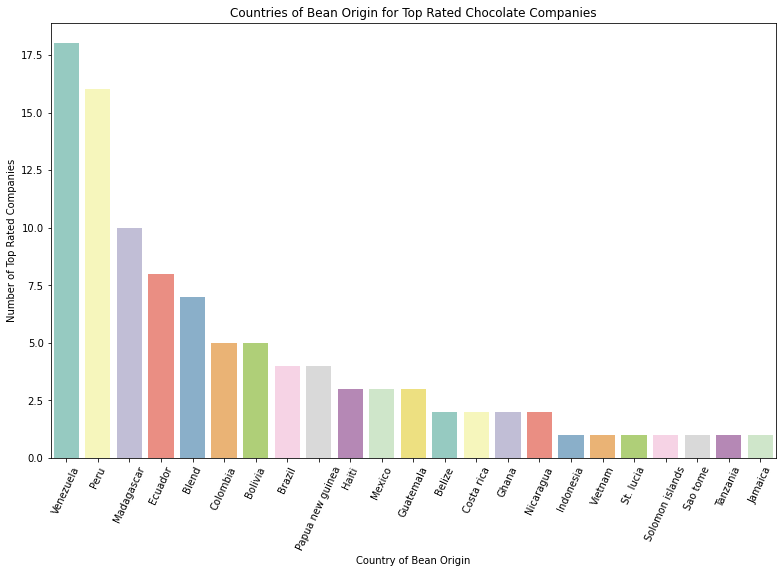

In [18]:
plt.figure(figsize=(13,8)) 
plt.xticks(rotation=65)
plt.title('Countries of Bean Origin for Top Rated Chocolate Companies')
sns.barplot(x=topBeanCountries.index, y=topBeanCountries, palette="Set3")
plt.xlabel("Country of Bean Origin")
plt.ylabel("Number of Top Rated Companies");

Top Thirty Companies With Best Rating

In [19]:
averageRating_df = chocolate_df.groupby(['company','company_location'], as_index=False)[['rating']].mean()
topThirty_df = averageRating_df.sort_values('rating', ascending=False).head(30)
topThirty_df

,company,company_location,rating
352,Ocelot,Scotland,3.875000
225,Heirloom Cacao Preservation (Zokoko),U.S.A,3.875000
303,Matale,Australia,3.812500
371,Patric,U.S.A,3.791667
233,Idilio (Felchlin),Switzerland,3.775000
343,Nikoa,Ecuador,3.750000
102,Chocola'te,U.S.A,3.750000
251,Kerchner,U.S.A,3.750000
461,Timo A. Meyer,Germany,3.750000
351,Obolo,Chile,3.750000


In [20]:
topCountries= topThirty_df.company_location.value_counts()
topCountries

U.S.A          15
Spain           2
Germany         2
Australia       2
New zealand     1
Ecuador         1
Scotland        1
Denmark         1
Switzerland     1
Madagascar      1
Canada          1
Chile           1
Belgium         1
Name: company_location, dtype: int64

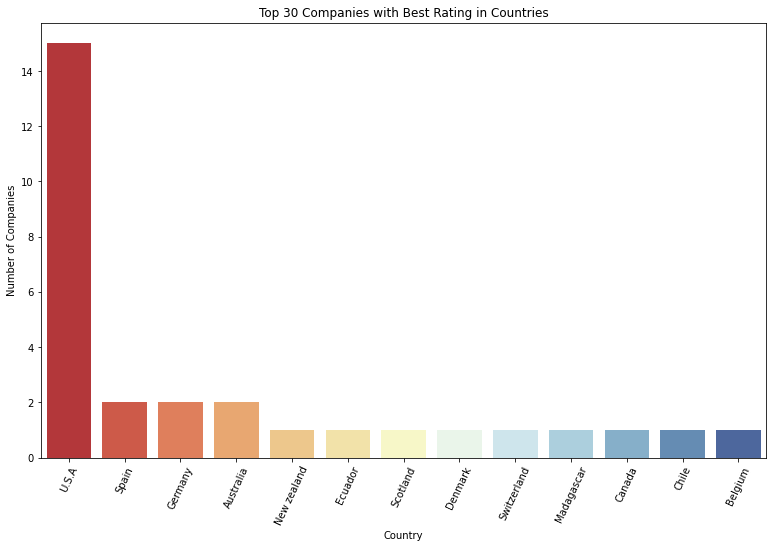

In [21]:
plt.figure(figsize=(13,8)) 
plt.xticks(rotation=65)
plt.title('Top 30 Companies with Best Rating in Countries')
sns.barplot(x=topCountries.index, y=topCountries, palette="RdYlBu")
plt.xlabel("Country")
plt.ylabel("Number of Companies");